Data Understanding

In [43]:
import pandas as pd
df=pd.read_csv("bi.csv",encoding='ISO-8859-1')
df.head()

,fNAME,lNAME,Age,gender,country,residence,entryEXAM,prevEducation,studyHOURS,Python,DB
0,Christina,Binger,44,Female,Norway,Private,72,Masters,158,59.0,55
1,Alex,Walekhwa,60,M,Kenya,Private,79,Diploma,150,60.0,75
2,Philip,Leo,25,Male,Uganda,Sognsvann,55,HighSchool,130,74.0,50
3,Shoni,Hlongwane,22,F,Rsa,Sognsvann,40,High School,120,NaN,44
4,Maria,Kedibone,23,Female,South Africa,Sognsvann,65,High School,122,91.0,80


In [44]:
df.shape

(77, 11)

In [45]:
df.dtypes

fNAME             object
lNAME             object
Age                int64
gender            object
country           object
residence         object
entryEXAM          int64
prevEducation     object
studyHOURS         int64
Python           float64
DB                 int64
dtype: object

In [46]:
df.describe()

,Age,entryEXAM,studyHOURS,Python,DB
count,77.000000,77.000000,77.000000,75.000000,77.000000
mean,35.207792,76.753247,149.714286,75.853333,69.467532
std,10.341966,16.475784,12.743272,15.410328,17.033701
min,21.000000,28.000000,114.000000,15.000000,30.000000
25%,27.000000,69.000000,144.000000,71.000000,56.000000
50%,33.000000,80.000000,156.000000,81.000000,71.000000
75%,42.000000,90.000000,158.000000,85.000000,83.000000
max,71.000000,98.000000,160.000000,91.000000,100.000000


Data Cleaning & missing values  

In [47]:
df[df.duplicated()]

,fNAME,lNAME,Age,gender,country,residence,entryEXAM,prevEducation,studyHOURS,Python,DB


In [48]:
df.duplicated().sum()

0

In [49]:
df.drop_duplicates(inplace=True)

In [50]:
df.isnull().sum()

fNAME            0
lNAME            0
Age              0
gender           0
country          0
residence        0
entryEXAM        0
prevEducation    0
studyHOURS       0
Python           2
DB               0
dtype: int64

In [51]:
df['Python'].fillna(df['Python'].mean(),inplace=True)

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   fNAME          77 non-null     object 
 1   lNAME          77 non-null     object 
 2   Age            77 non-null     int64  
 3   gender         77 non-null     object 
 4   country        77 non-null     object 
 5   residence      77 non-null     object 
 6   entryEXAM      77 non-null     int64  
 7   prevEducation  77 non-null     object 
 8   studyHOURS     77 non-null     int64  
 9   Python         77 non-null     float64
 10  DB             77 non-null     int64  
dtypes: float64(1), int64(4), object(6)
memory usage: 6.7+ KB


In [53]:
df.nunique()

fNAME            71
lNAME            66
Age              32
gender            6
country          16
residence         6
entryEXAM        36
prevEducation    10
studyHOURS       18
Python           32
DB               40
dtype: int64

In [54]:
for col in df.columns:
    print(f"\nستون {col}:{df[col].unique()}\n")


ستون fNAME:['Christina' 'Alex' 'Philip' 'Shoni' 'Maria' 'Hannah' 'Ole' 'Lars' 'Bjørn'
 'Sofie' 'Emma' 'Solveig' 'Odd' 'Grethe' 'Marco' 'Ingrid' 'Hanna' 'Jorunn'
 'Sebastian' 'Camilla' 'Prof' 'Kristine' 'Carmen' 'Gunnar' 'Gerd' 'Aisha'
 'Kato' 'Nansubuga' 'Joakim' 'Don' 'Perry' 'Frank' 'Line' 'Thor' 'Petter'
 'Sindre' 'Simen' 'Bjørg' 'Trond' 'Emily' 'Unni' 'Ruth' 'Inger' 'Peninah'
 'Berit' 'Jenny' 'Thea' 'Dag' 'Mwanaidi' 'Chinedu' 'Irene' 'Marianne'
 'Jens' 'Morten' 'Karoline' 'Ola' 'Tore' 'Caroline' 'Silvia' 'Valentino'
 'Peter' 'Anna' 'Lucas' 'Marie' 'Thomas' 'Maximilan' 'Clara' 'Julian'
 'Sophie' 'Leon' 'Mohammed']


ستون lNAME:['Binger' 'Walekhwa' 'Leo' 'Hlongwane' 'Kedibone' 'Hansen' 'Johansen'
 'Olsen' 'Larsen' 'Jensen' 'de Vries' 'Eliassen' 'Knudsen' 'Myklebust'
 'Rossi' 'Eide' 'Andresen' 'Kristiansen' 'Mikkelsen' 'Birkeland' 'Isaksen'
 'Berg' 'Rodríguez' 'Ahmed' 'Brekke' 'Bakken' 'Nakaweesi' 'Muwanguzi'
 'Nakalema' 'Edvardsen' 'Pettersen' 'Rønning' 'Abrahamsen' 'Næss'
 'Sandvik

In [55]:
df['gender'] = df['gender'].replace({'M': 'Male','F': 'Female','male':'Male','female':'Female'})
df['country']=df['country'].replace({'norway':'Norway'})
df['residence']=df['residence'].replace({'BI Residence':'BI_Residence','BIResidence':'BI_Residence','BI-Residence':'BI_Residence'})
df['prevEducation']=df['prevEducation'].replace({'Barrrchelors':'Bachelors','HighSchool':'High School','Diplomaaa':'Diploma','DIPLOMA':'Diploma','diploma':'Diploma'})

In [56]:
df['residence'].value_counts()

residence
Private         33
BI_Residence    32
Sognsvann       12
Name: count, dtype: int64

In [57]:
df['country'].unique()

array(['Norway', 'Kenya', 'Uganda', 'Rsa', 'South Africa', 'Norge',
       'Denmark', 'Netherlands', 'Italy', 'Spain', 'UK', 'Somali',
       'Nigeria', 'Germany', 'France'], dtype=object)

In [58]:
df_no_outliers = df.copy()
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
for coll in numerical_cols:
    Q1=df[coll].quantile(0.25)
    Q3=df[coll].quantile(0.75)
    IQR=Q3-Q1
    lower_bound=Q1-1.5*IQR
    upper_bound=Q3+1.5*IQR
    outliers=(df[coll] < lower_bound) | (df[coll] > upper_bound)
    print(f'columns:{coll}\noutlier is :\n{df[outliers][coll]}')
    print('\n')
    df_no_outliers = df_no_outliers[(df_no_outliers[coll] >= lower_bound) & (df_no_outliers[coll] <= upper_bound)]
    print(f'columns:{coll}\ndata wihout any outlier \n {df_no_outliers[coll]}\n\n')

columns:Age
outlier is :
32    71
55    69
Name: Age, dtype: int64


columns:Age
data wihout any outlier 
 0     44
1     60
2     25
3     22
4     23
      ..
72    43
73    31
74    33
75    35
76    31
Name: Age, Length: 75, dtype: int64


columns:entryEXAM
outlier is :
32    30
53    28
76    35
Name: entryEXAM, dtype: int64


columns:entryEXAM
data wihout any outlier 
 0     72
1     79
2     55
3     40
4     65
      ..
71    74
72    80
73    90
74    96
75    90
Name: entryEXAM, Length: 73, dtype: int64


columns:studyHOURS
outlier is :
3     120
4     122
20    116
21    114
32    120
49    120
53    120
Name: studyHOURS, dtype: int64


columns:studyHOURS
data wihout any outlier 
 0     158
1     150
2     130
5     130
6     156
     ... 
71    140
72    150
73    158
74    158
75    160
Name: studyHOURS, Length: 68, dtype: int64


columns:Python
outlier is :
20    33.0
21    30.0
32    31.0
48    48.0
49    45.0
53    15.0
Name: Python, dtype: float64


columns:Python
data

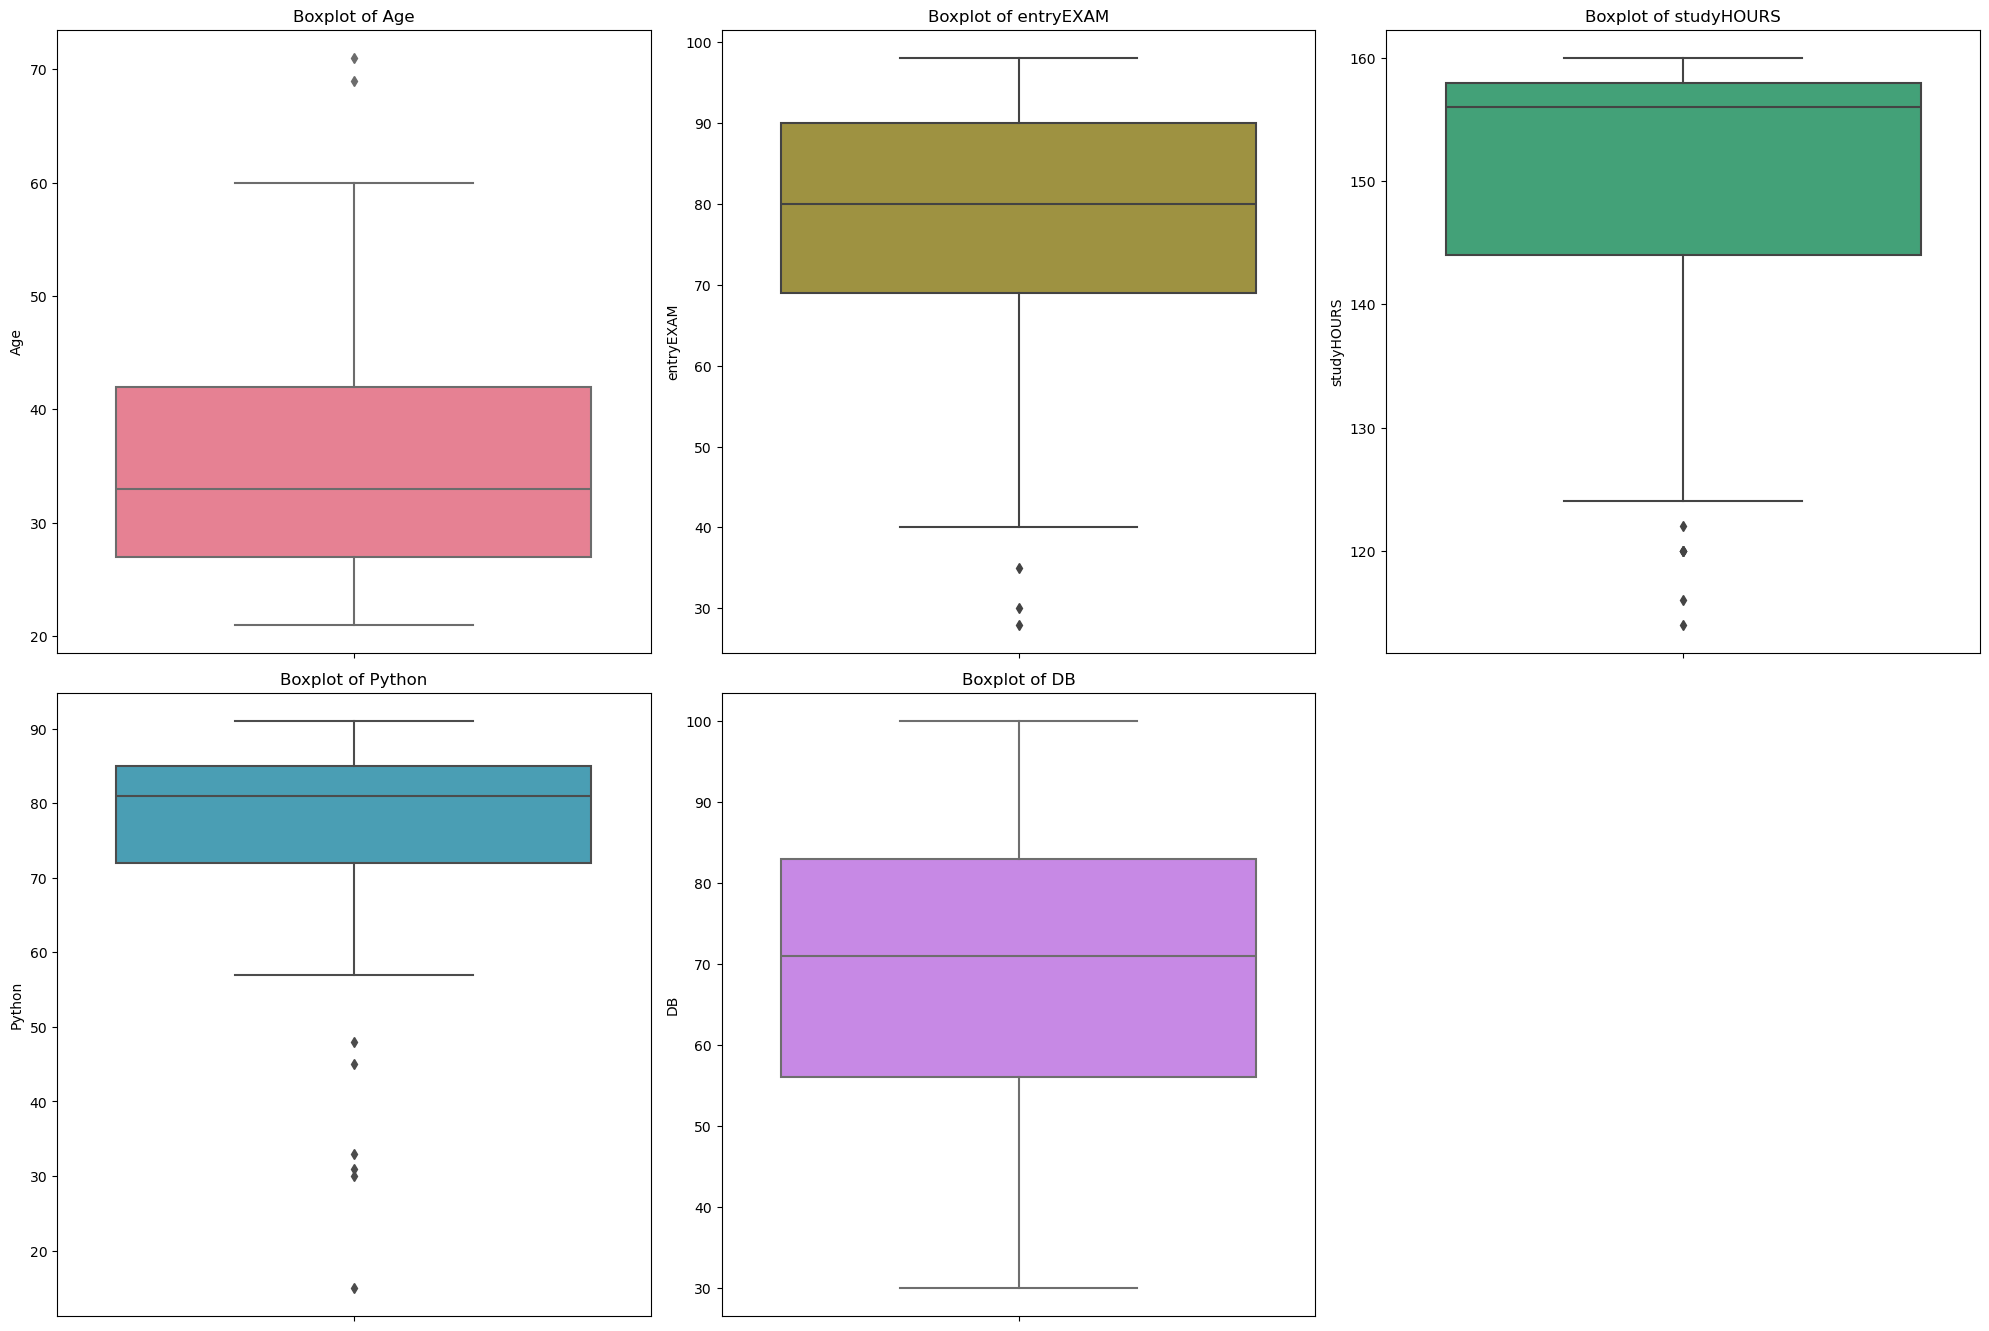

In [59]:
import matplotlib.pyplot as plt
import seaborn as sns
# Identify numerical columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
# Define color palette
palette = sns.color_palette("husl",len(numerical_cols))
#to show Outliers in data 
plt.figure(figsize=(20, 20))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(3,3, i)
    sns.boxplot(y=df[col], color=palette[i-1])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()



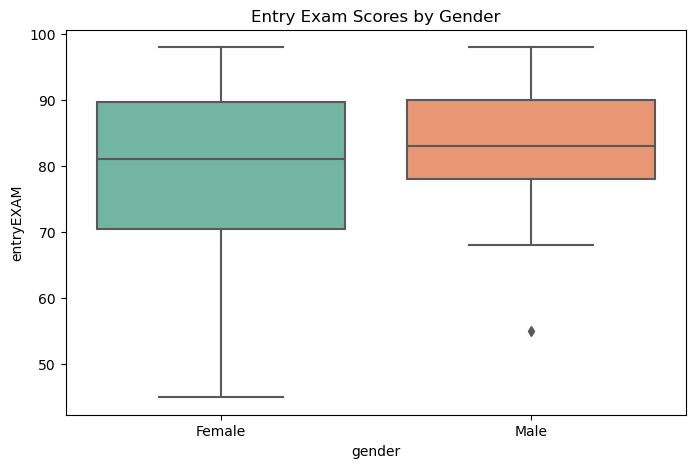

In [60]:
plt.figure(figsize=(8,5))
sns.boxplot(x="gender", y="entryEXAM", data=df_no_outliers, palette="Set2")
plt.title("Entry Exam Scores by Gender")
plt.show()

In [61]:
df.columns

Index(['fNAME', 'lNAME', 'Age', 'gender', 'country', 'residence', 'entryEXAM',
       'prevEducation', 'studyHOURS', 'Python', 'DB'],
      dtype='object')

In [62]:
df['country'].value_counts().sort_values(ascending=False)

country
Norway          48
Uganda           4
Kenya            3
Germany          3
Denmark          2
Netherlands      2
Italy            2
Spain            2
UK               2
Somali           2
Nigeria          2
France           2
Rsa              1
South Africa     1
Norge            1
Name: count, dtype: int64

EDA(Exploratory Data Analysis)

Here we will visualize the data to unearth interesting patterns. We will employ various visualization methods:

    Histograms for numeric distributions
    Count plots (pie charts with countplot) for categorical variables
    Box and violin plots to explore distributions
    Pair plots to observe relationships

Before performing correlation analysis, we restrict the dataframe to numeric columns. If there are fewer than four numeric columns, we would skip a correlation heatmap.



1. Generate descriptive statistics

In [63]:
df.describe().T


,count,mean,std,min,25%,50%,75%,max
Age,77.0,35.207792,10.341966,21.0,27.0,33.0,42.0,71.0
entryEXAM,77.0,76.753247,16.475784,28.0,69.0,80.0,90.0,98.0
studyHOURS,77.0,149.714286,12.743272,114.0,144.0,156.0,158.0,160.0
Python,77.0,75.853333,15.206208,15.0,72.0,81.0,85.0,91.0
DB,77.0,69.467532,17.033701,30.0,56.0,71.0,83.0,100.0


2. Plot distribution of numerical variables

c:\Users\Partiran\anaconda3\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


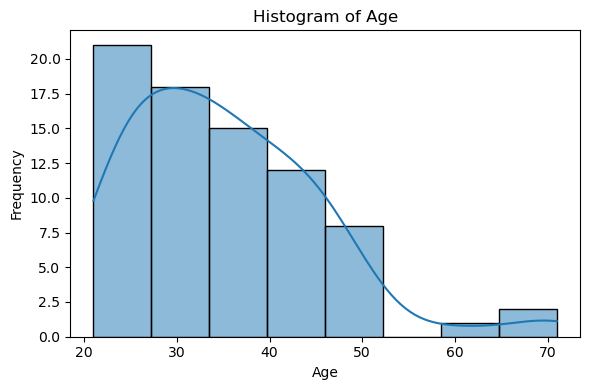

c:\Users\Partiran\anaconda3\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


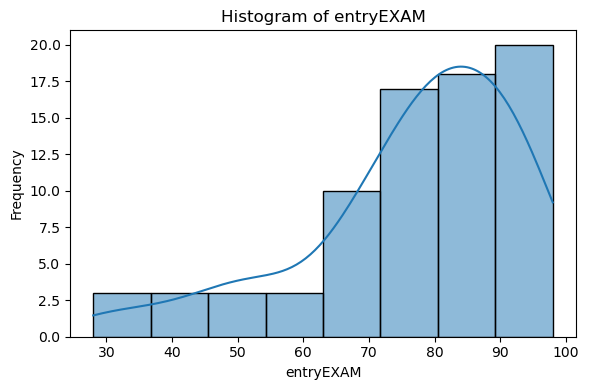

c:\Users\Partiran\anaconda3\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


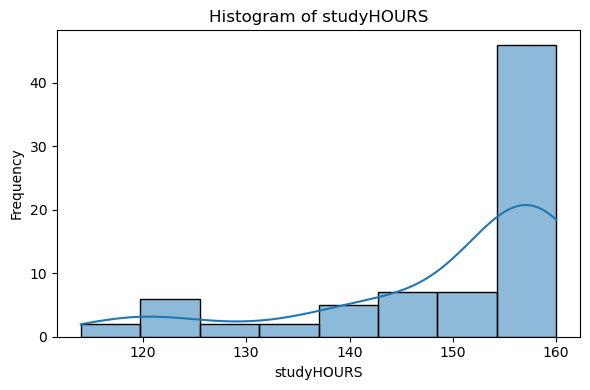

c:\Users\Partiran\anaconda3\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


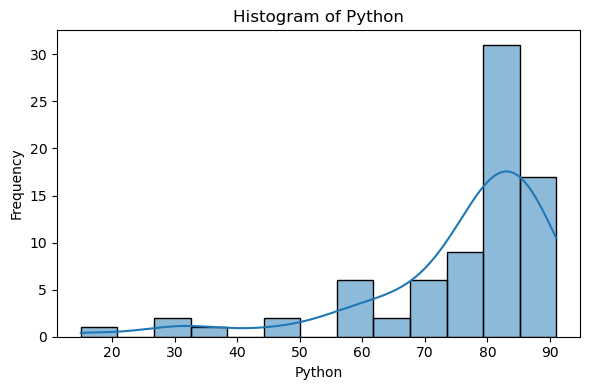

c:\Users\Partiran\anaconda3\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


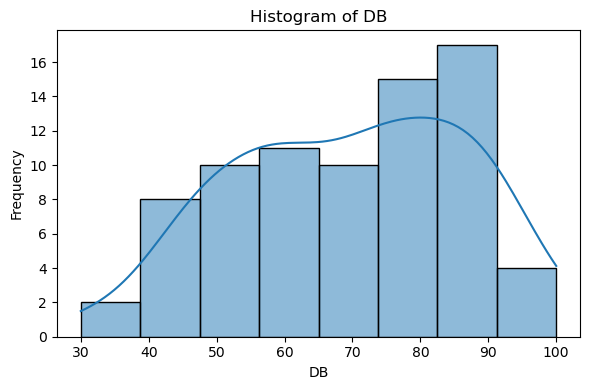

In [64]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of numeric columns from the data
numerical_columns=df[df.select_dtypes(include=['int64', 'float64']).columns]

### Histograms for numeric variables
for col in numerical_columns:
    plt.figure(figsize=(6,4))
    sns.histplot(numerical_columns[col], kde=True)
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

3. Barplot for categorical variables

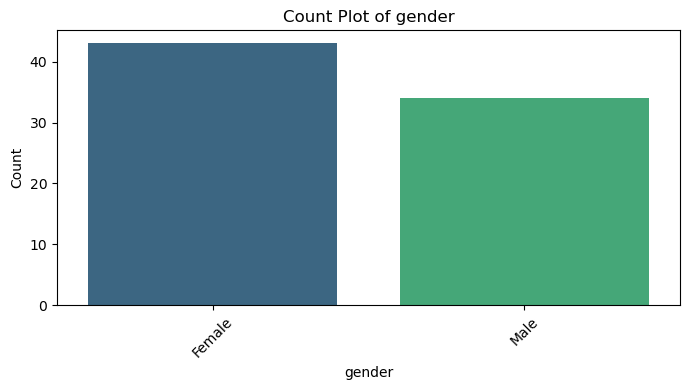

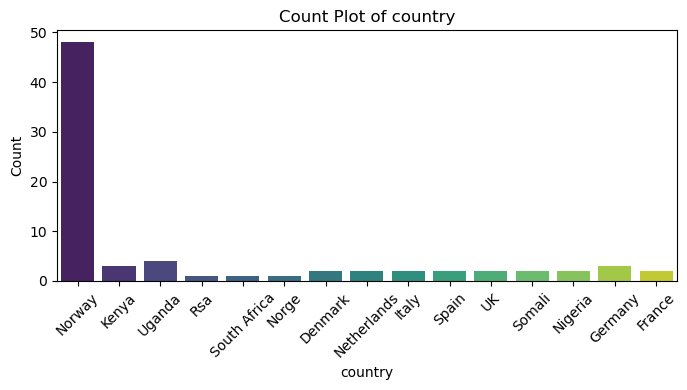

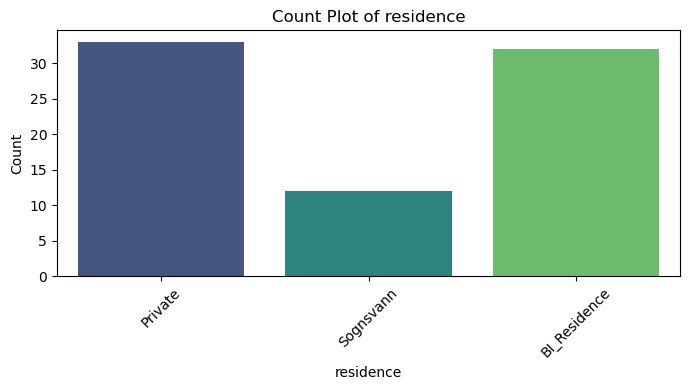

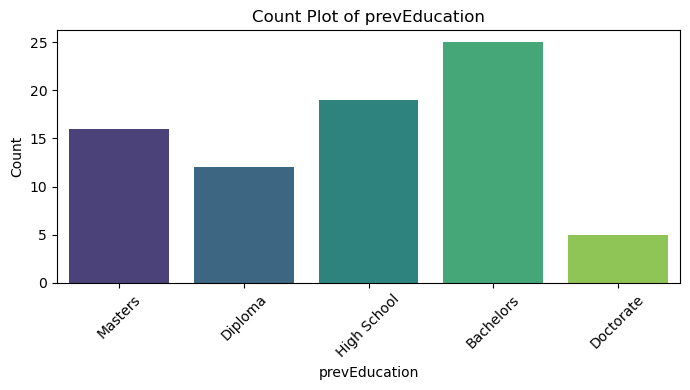

In [65]:
## Count plots for categorical variables (gender, country, residence, prevEducation)
categorical_cols = ['gender', 'country', 'residence', 'prevEducation']
for col in categorical_cols:
    if col in df.columns:
        plt.figure(figsize=(7,4))
        sns.countplot(data=df,x=col , palette='viridis')
        plt.title(f'Count Plot of {col}')
        plt.xlabel(col)
        plt.ylabel('Count')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

4. Heatmap of correlations

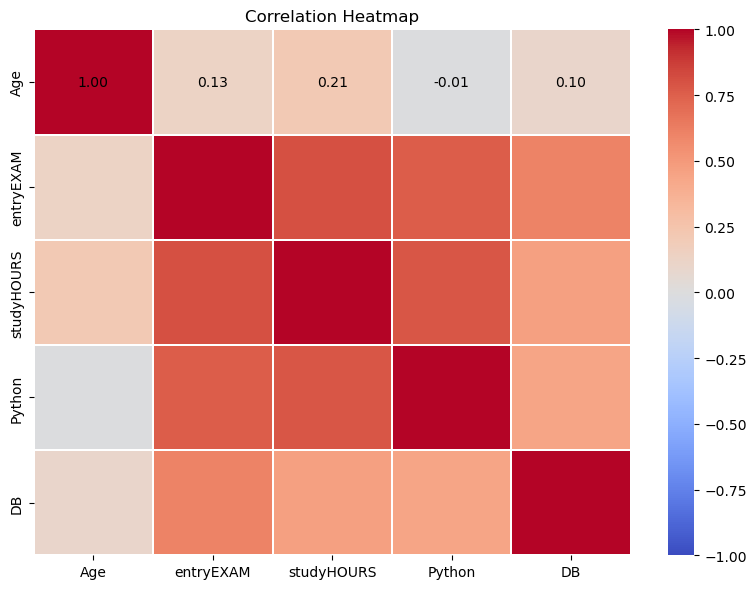

In [66]:

# Correlation Heatmap - ensure at least 2 numeric columns are available
numerical_columns=df[df.select_dtypes(include=['int64', 'float64','int32']).columns]
if numerical_columns.shape[1] >= 2:
    plt.figure(figsize=(8,6))
    corr = numerical_columns.corr()
    sns.heatmap(corr, cmap='coolwarm', fmt='.2f',annot_kws={'color': 'black'}, vmin=-1, vmax=1, linewidths=0.2, annot=True)
    plt.title('Correlation Heatmap')
    plt.tight_layout()
    plt.show()
else:
    print('Not enough numeric columns for a correlation heatmap.')

5. Scatterplot studyHOURS vs scores

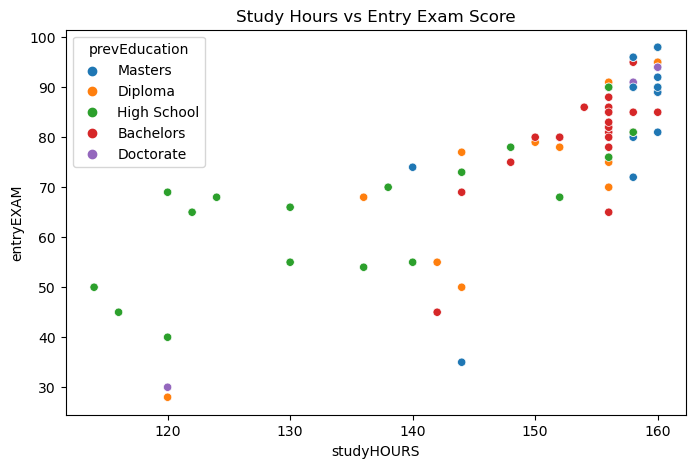

In [67]:
plt.figure(figsize=(8,5))
sns.scatterplot(x="studyHOURS", y="entryEXAM", hue="prevEducation", data=df)
plt.title("Study Hours vs Entry Exam Score")
plt.show()



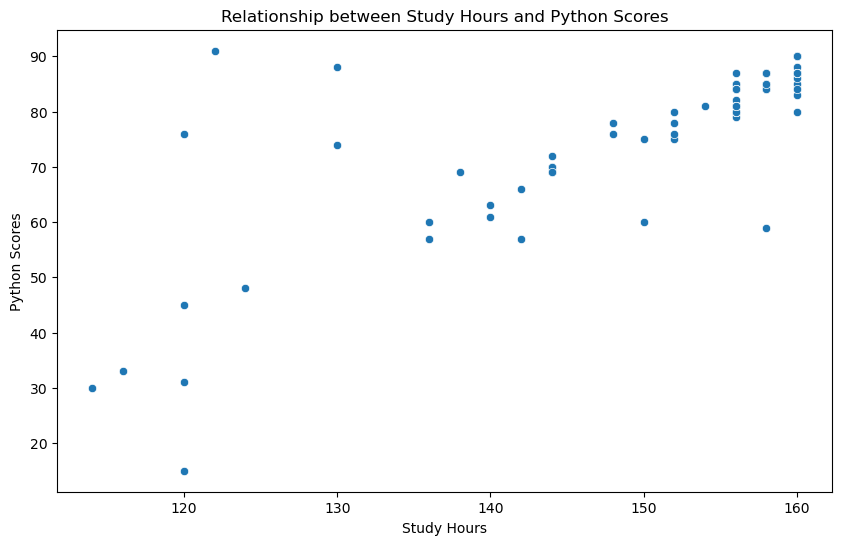

The Correlationship between Study Hours and Python Scores is: 0.78


In [68]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot to show relationship
plt.figure(figsize=(10,6))
sns.scatterplot(x=df['studyHOURS'], y=df['Python'])
plt.title("Relationship between Study Hours and Python Scores")
plt.xlabel("Study Hours")
plt.ylabel("Python Scores")
plt.show()

# Correlation coefficient
correlation = df['studyHOURS'].corr(df['Python'])

print(f'The Correlationship between Study Hours and Python Scores is: {correlation:.2f}')

c:\Users\Partiran\anaconda3\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Partiran\anaconda3\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Partiran\anaconda3\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Partiran\anaconda3\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future

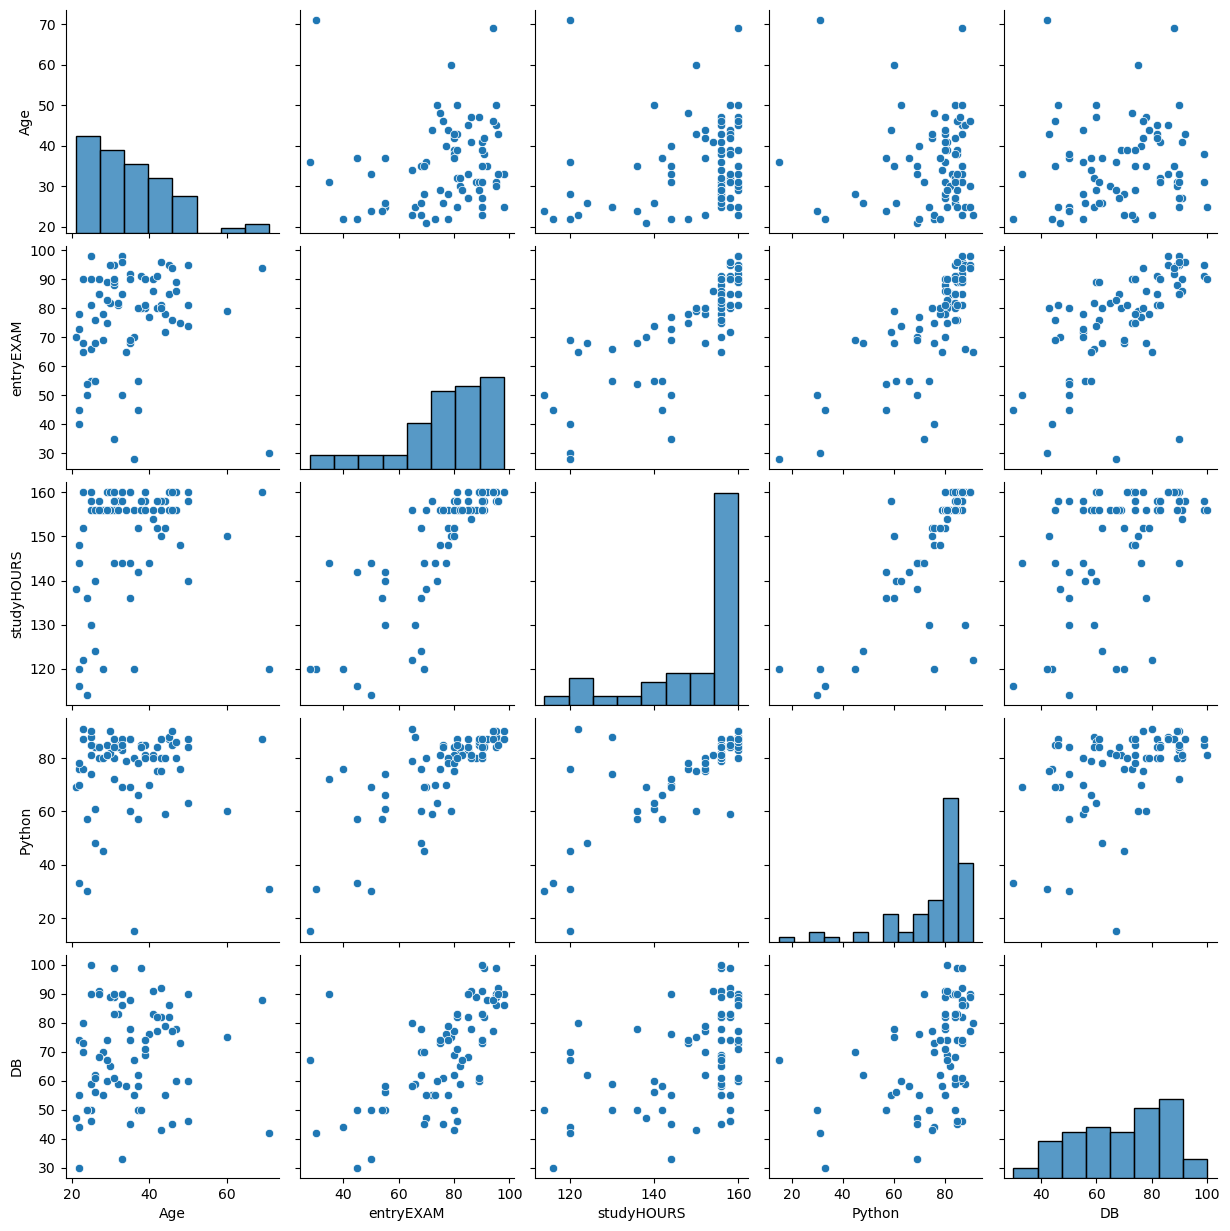

In [69]:
# Pair Plot to examine relationships among numeric variables
sns.pairplot(numerical_columns)
plt.show()


1. Examining the distribution of each column (diagonal plots)

On the diagonal of the matrix, a histogram of each column is displayed.

Example:

Column studyHOURS → most students studied between 120 and 160 hours.

Column Python → most scores are between 60 and 80.

This helps to see the concentration of data and detect skewness or asymmetrical distributions.

🔹 2. Examining pairwise relationships (scatter plots)

Each off-diagonal cell shows a scatter plot between two numeric columns.

Example:

studyHOURS vs scores → the scatter is roughly upward, meaning more study is associated with higher scores.

entryEXAM vs Python → a relative upward trend is observed.

🔹 3. Detecting correlations

From the scatter plots, we can see which variables are positively correlated:

studyHOURS and Python → almost a positive correlation.

DB and Python → moderate to positive correlation.

If points are very scattered → correlation is low.

🔹 4. Identifying outliers

Points far away from the rest of the scatter → possible outliers.

For example, in studyHOURS, a few samples below 120 hours could be checked.

🔹 5. Quick summary

Most columns have roughly normal or semi-normal distributions.
Some positive correlations are observed between scores and study hours.
Some outliers can be identified.

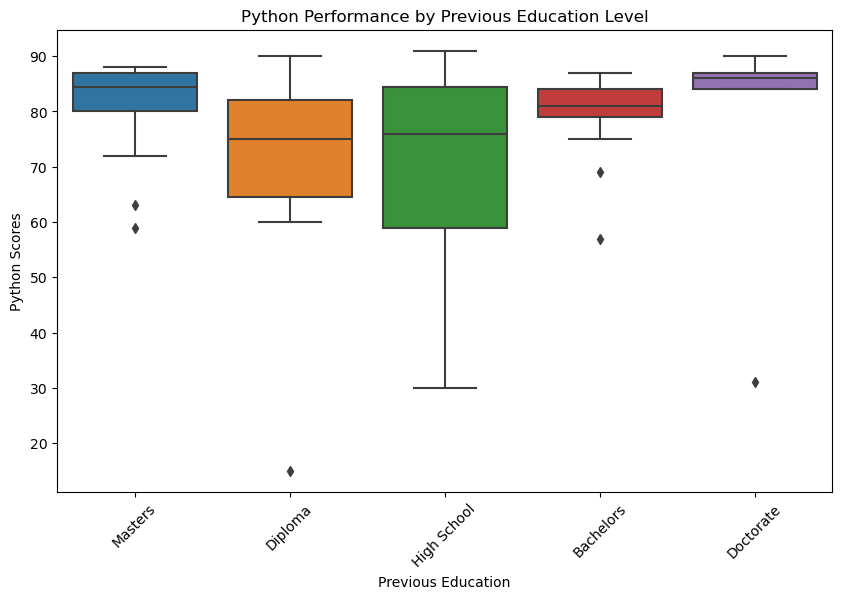

Average (Mean) Python score for each education level
prevEducation
Bachelors      80.000000
Diploma        70.083333
Doctorate      75.600000
High School    69.616140
Masters        81.187500
Name: Python, dtype: float64
 *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  * 
Median Python score for each education level
prevEducation
Bachelors      81.000000
Diploma        75.000000
Doctorate      86.000000
High School    75.853333
Masters        84.500000
Name: Python, dtype: float64


In [70]:
# Box plot to visualize Python performance by education level
plt.figure(figsize=(10,6))
sns.boxplot(x=df['prevEducation'], y=df['Python'])
plt.title("Python Performance by Previous Education Level")
plt.xlabel("Previous Education")
plt.ylabel("Python Scores")
plt.xticks(rotation=45)
plt.show()

# Calculate the average (Mean) Python score for each education level
education_python_avg = df.groupby('prevEducation')['Python'].mean()
print('Average (Mean) Python score for each education level')
print(education_python_avg)

print(' * '*20)
# Calculate the Median Python score for each education level
education_python_median = df.groupby('prevEducation')['Python'].median()
print('Median Python score for each education level')
print(education_python_median)

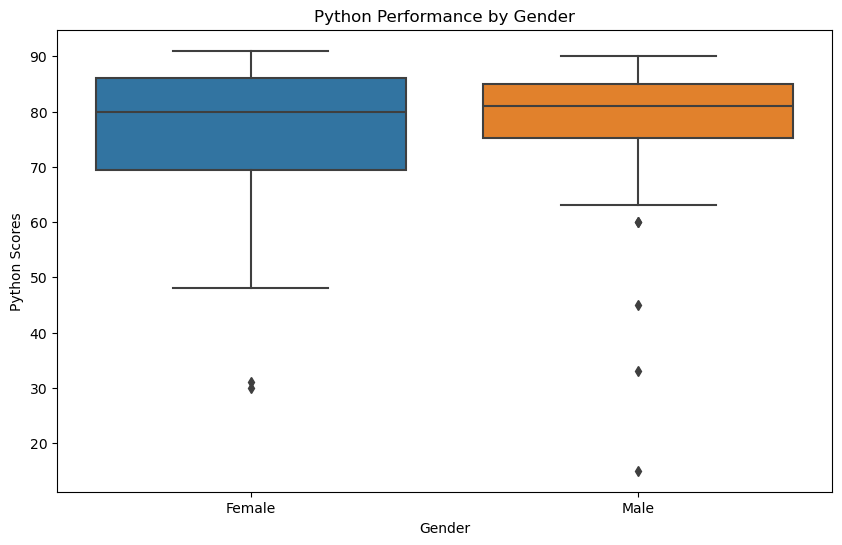

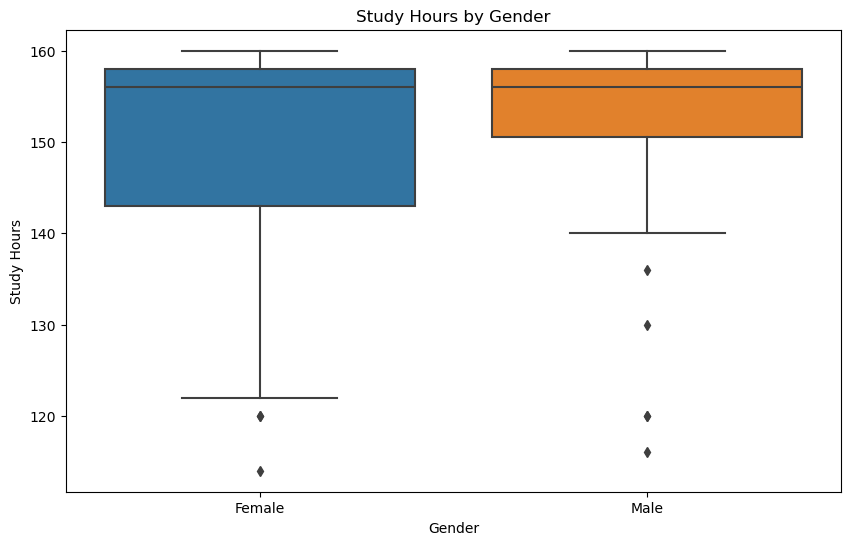

In [71]:
# Box plot to visualize Python scores by gender
plt.figure(figsize=(10,6))
sns.boxplot(x=df['gender'], y=df['Python'])
plt.title("Python Performance by Gender")
plt.xlabel("Gender")
plt.ylabel("Python Scores")
plt.show()

# Box plot to visualize study hours by gender
plt.figure(figsize=(10,6))
sns.boxplot(x=df['gender'], y=df['studyHOURS'])
plt.title("Study Hours by Gender")
plt.xlabel("Gender")
plt.ylabel("Study Hours")
plt.show()

Feature Engineering

Encode categorical variables

In [72]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for column in ['gender','country','residence','prevEducation']:
    df[column]=le.fit_transform(df[column])
df.head()

,fNAME,lNAME,Age,gender,country,residence,entryEXAM,prevEducation,studyHOURS,Python,DB
0,Christina,Binger,44,0,8,1,72,4,158,59.000000,55
1,Alex,Walekhwa,60,1,4,1,79,1,150,60.000000,75
2,Philip,Leo,25,1,14,2,55,3,130,74.000000,50
3,Shoni,Hlongwane,22,0,9,2,40,3,120,75.853333,44
4,Maria,Kedibone,23,0,11,2,65,3,122,91.000000,80


Create binary column Pass_Python

In [73]:
df['Pass_Python'] = df['Python'].apply(lambda x: 1 if x >= 60 else 0)
df.head()

,fNAME,lNAME,Age,gender,country,residence,entryEXAM,prevEducation,studyHOURS,Python,DB,Pass_Python
0,Christina,Binger,44,0,8,1,72,4,158,59.000000,55,0
1,Alex,Walekhwa,60,1,4,1,79,1,150,60.000000,75,1
2,Philip,Leo,25,1,14,2,55,3,130,74.000000,50,1
3,Shoni,Hlongwane,22,0,9,2,40,3,120,75.853333,44,1
4,Maria,Kedibone,23,0,11,2,65,3,122,91.000000,80,1


Standardize numerical features (StandardScaler)

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   fNAME          77 non-null     object 
 1   lNAME          77 non-null     object 
 2   Age            77 non-null     int64  
 3   gender         77 non-null     int32  
 4   country        77 non-null     int32  
 5   residence      77 non-null     int32  
 6   entryEXAM      77 non-null     int64  
 7   prevEducation  77 non-null     int32  
 8   studyHOURS     77 non-null     int64  
 9   Python         77 non-null     float64
 10  DB             77 non-null     int64  
 11  Pass_Python    77 non-null     int64  
dtypes: float64(1), int32(4), int64(5), object(2)
memory usage: 6.1+ KB


In [75]:
from sklearn.preprocessing import StandardScaler
import numpy as np
df_numeric_columns=df.select_dtypes(np.number)
scaler=StandardScaler()
x=df_numeric_columns.drop(columns=['Pass_Python'])
df_numeric_Standardize=scaler.fit_transform(x)
print("5 sample of standard",df_numeric_Standardize[:5])

5 sample of standard [[ 0.85572342 -0.88921183  0.13443996  0.36588087 -0.29039078  1.35200491
   0.65446673 -1.11558699 -0.85491713]
 [ 2.41296308  1.12459143 -1.20128606  0.36588087  0.13726122 -0.54080196
   0.02256782 -1.04939314  0.32692522]
 [-0.99349868  1.12459143  2.13802899  1.7745222  -1.32897421  0.72106929
  -1.55717945 -0.12267927 -1.15037772]
 [-1.28548112 -0.88921183  0.46837146  1.7745222  -2.24537136  0.72106929
  -2.34705309  0.         -1.50493043]
 [-1.18815364 -0.88921183  1.13623447  1.7745222  -0.71804278  0.72106929
  -2.18907836  1.00261616  0.62238581]]


In [76]:
df.head()

,fNAME,lNAME,Age,gender,country,residence,entryEXAM,prevEducation,studyHOURS,Python,DB,Pass_Python
0,Christina,Binger,44,0,8,1,72,4,158,59.000000,55,0
1,Alex,Walekhwa,60,1,4,1,79,1,150,60.000000,75,1
2,Philip,Leo,25,1,14,2,55,3,130,74.000000,50,1
3,Shoni,Hlongwane,22,0,9,2,40,3,120,75.853333,44,1
4,Maria,Kedibone,23,0,11,2,65,3,122,91.000000,80,1


Modeling	
Split data into Train/Test (80/20)

In [77]:
from sklearn.model_selection import train_test_split
x=df[['entryEXAM','studyHOURS','residence','country','Age','gender','prevEducation']]
y=df['Python']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)
print("train:",x_train.shape)
print("test:",x_test.shape)

train: (53, 7)
test: (24, 7)


5 first sample of standard  [[ 0.33687048  0.47060452  1.79449981 -1.23725094 -0.58558169  1.09924216
  -1.20767056]
 [ 0.14827046  0.62649227  0.37497011  0.11479648  0.22170868 -0.90971765
   1.25411943]
 [-0.10319624  0.47060452  0.37497011  0.11479648  0.93930011  1.09924216
  -0.59222306]
 [ 0.71407053  0.78238001 -1.04455959  0.11479648 -0.58558169  1.09924216
  -1.20767056]
 [ 0.77693721  0.78238001 -1.04455959  0.11479648 -1.12377527 -0.90971765
   0.63867193]]
r2 is : 0.44705149506343644


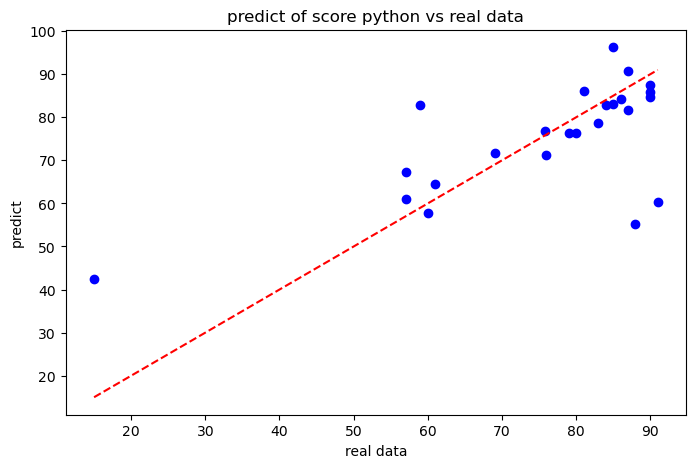

In [78]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
import seaborn as sns
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.transform(x_test)
print("5 first sample of standard ",x_train_scaled[:5])
#linear regression
model=LinearRegression()
model.fit(x_train_scaled,y_train)
y_pred_lr=model.predict(x_test_scaled)
#r2
r2=r2_score(y_test,y_pred_lr)
print("r2 is :",r2)
#plot of real data
plt.figure(figsize=(8,5))
plt.scatter(y_test,y_pred_lr,color='blue')
plt.plot([y_test.min(),y_test.max()],[y_test.min(),y_test.max()],'r--')
plt.title("predict of score python vs real data")
plt.xlabel("real data")
plt.ylabel("predict")
plt.show()


In [79]:
corr

,Age,entryEXAM,studyHOURS,Python,DB
Age,1.000000,0.131427,0.214712,-0.014306,0.099454
entryEXAM,0.131427,1.000000,0.807851,0.759270,0.608464
studyHOURS,0.214712,0.807851,1.000000,0.783652,0.466043
Python,-0.014306,0.759270,0.783652,1.000000,0.442654
DB,0.099454,0.608464,0.466043,0.442654,1.000000


In [80]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
dt = DecisionTreeRegressor(random_state=42)
dt.fit(x_train, y_train)
y_pred_dt = dt.predict(x_test)

# مدل Random Forest
rf = RandomForestRegressor(random_state=42)
rf.fit(x_train, y_train)
y_pred_rf = rf.predict(x_test)

In [81]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def evaluate_model(y_test, y_pred):
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    return mae, mse, rmse, r2

# ارزیابی Linear Regression
mae_lr, mse_lr, rmse_lr, r2_lr = evaluate_model(y_test, y_pred_lr)
print('Linear Regression: MAE={:.2f}, MSE={:.2f}, RMSE={:.2f}, R2={:.2f}'.format(mae_lr, mse_lr, rmse_lr, r2_lr))

# ارزیابی Decision Tree
mae_dt, mse_dt, rmse_dt, r2_dt = evaluate_model(y_test, y_pred_dt)
print('Decision Tree: MAE={:.2f}, MSE={:.2f}, RMSE={:.2f}, R2={:.2f}'.format(mae_dt, mse_dt, rmse_dt, r2_dt))

# ارزیابی Random Forest
mae_rf, mse_rf, rmse_rf, r2_rf = evaluate_model(y_test, y_pred_rf)
print('Random Forest: MAE={:.2f}, MSE={:.2f}, RMSE={:.2f}, R2={:.2f}'.format(mae_rf, mse_rf, rmse_rf, r2_rf))

Linear Regression: MAE=8.18, MSE=158.59, RMSE=12.59, R2=0.45
Decision Tree: MAE=7.14, MSE=96.33, RMSE=9.82, R2=0.66
Random Forest: MAE=7.54, MSE=133.71, RMSE=11.56, R2=0.53


In [85]:
from  sklearn.ensemble import GradientBoostingRegressor

gb_model = GradientBoostingRegressor(n_estimators=100,random_state=42)
gb_model.fit(x_train, y_train)
y_pred_gb = gb_model.predict(x_test)
r2 = r2_score(y_test, y_pred_gb)

train_score =gb_model.score(x_train, y_train)
test_score = gb_model.score(x_test, y_test)
mae_rf, mse_rf, rmse_rf, r2_rf = evaluate_model(y_test, y_pred_gb)
print('Random Forest: MAE={:.2f}, MSE={:.2f}, RMSE={:.2f}, R2={:.2f}'.format(mae_rf, mse_rf, rmse_rf, r2_rf))
print(f"(R2 score) in the training set is {train_score:0.2%} for model.")
print(f"(R2 score) in the testing set is {test_score:0.2%} for  model.")
print("R2 Score Of GradiantBoosting :", r2)

Random Forest: MAE=6.43, MSE=82.77, RMSE=9.10, R2=0.71
(R2 score) in the training set is 99.94% for model.
(R2 score) in the testing set is 71.14% for  model.
R2 Score Of GradiantBoosting : 0.71139568283426


In [86]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,
    classification_report, confusion_matrix
)
x_lo=df_numeric_columns.drop(columns=['Pass_Python'])

y_binary = df['Pass_Python']

X_train_bin, X_test_bin, y_train_bin, y_test_bin = train_test_split(x_lo, y_binary, test_size=0.2, random_state=42)

# استانداردسازی
X_train_bin_scaled = scaler.fit_transform(X_train_bin)
X_test_bin_scaled = scaler.transform(X_test_bin)

# مدل رگرسیون لجستیک
model_log = LogisticRegression()
model_log.fit(X_train_bin_scaled, y_train_bin)

# پیش‌بینی
y_pred_bin = model_log.predict(X_test_bin_scaled)

y_pred_bin = model_log.predict(X_test_bin_scaled)
y_pred_proba = model_log.predict_proba(X_test_bin_scaled)[:, 1]  # احتمال کلاس مثبت

# 6️⃣ محاسبه معیارهای ارزیابی
accuracy = accuracy_score(y_test_bin, y_pred_bin)
precision = precision_score(y_test_bin, y_pred_bin)
recall = recall_score(y_test_bin, y_pred_bin)
f1 = f1_score(y_test_bin, y_pred_bin)
roc_auc = roc_auc_score(y_test_bin, y_pred_proba)

# 7️⃣ چاپ نتایج
print("✅ Logistic Regression Evaluation")
print(f"Accuracy : {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall   : {recall:.4f}")
print(f"F1-score : {f1:.4f}")
print(f"ROC-AUC  : {roc_auc:.4f}")

print("\nClassification Report:\n", classification_report(y_test_bin, y_pred_bin))
print("Confusion Matrix:\n", confusion_matrix(y_test_bin, y_pred_bin))

✅ Logistic Regression Evaluation
Accuracy : 0.8750
Precision: 0.8667
Recall   : 1.0000
F1-score : 0.9286
ROC-AUC  : 0.9744

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.33      0.50         3
           1       0.87      1.00      0.93        13

    accuracy                           0.88        16
   macro avg       0.93      0.67      0.71        16
weighted avg       0.89      0.88      0.85        16

Confusion Matrix:
 [[ 1  2]
 [ 0 13]]
